# Projet 2 - Analysez des données de systèmes éducatifs

# Sommaire:
  
- <a href="#C0">Introduction</a>
 
**Partie 1: Nettoyage du jeu de données**
- <a href="#C0">1.0 Mise en place environnement Python</a>
- <a href="#C1">1.1 Importation du jeu de données</a>
- <a href="#C2">1.2 Description du jeu de données</a>
- <a href="#C3">1.3 Qualité du jeu de données - valeurs manquantes</a>
- <a href="#C4">1.4 Qualité du jeu de données - doublons</a>
- <a href="#C5">1.5 Choix des variables</a>
- <a href="#C6">1.6 Filtrage des variables choisies</a>
- <a href="#C7">1.7 Fusion des données filtrées</a>
- <a href="#C8">1.8 Validation des données nettoyées</a>

**Partie 2: Analyse exploratoire du jeu de données**
 
- <a href="#C11">2.1 Analyse univariée</a>
  - <a href="#C111">2.1.1 Variable Internet</a>
  - <a href="#C112">2.1.2 Variable Population15to24</a>
  - <a href="#C113">2.1.3 Variable Enrolment_Secondary</a>
  - <a href="#C114">2.1.4 Variable Enrolment_Tertiary</a>
  - <a href="#C115">2.1.5 Variable PIB_hab</a>
- <a href="#C12">2.2 Détection et traitement des outliers</a>
  - <a href="#C121">2.2.1 Approche statistique (méthode interquartile)</a>
  - <a href="#C122">2.2.2 Approche métier</a>        
- <a href="#C13">2.3 Représentation graphique des distributions</a>
- <a href="#C14">2.4 Calcul d'un score d'attractivité par pays</a>
    


# <a name="C0">Introduction</a>

Academy propose des contenus de formation en ligne pour un public de niveau lycée et université.

Le but de cette analyse exploratoire est de vérifier si les données proposées sont exploitables et si elles permettent d'identifier les pays les plus adaptés à un développement commercial à l'international.

Au préalable, un nettoyage du jeu de données est nécessaire.

# <a name="C0">1.0: Mise en place environnement Python</a> 

Depuis le terminal:
    
    - Un environnement virtuel "Projet2" a été créé et activé pour assurer l’isolement du projet et la gestion des dépendances.
    - Le package Missingno a été installé avec pip
    - Les versions des packages installés ont été vérifiées avec pip list

Importation des librairies numpy, Pandas, Pyplot, Missingno et stats

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

# <a name="C1">1.1: Importation du jeu de données</a>

Les données récupérées sur le site de la banque mondiale comportent par pays, plus de 4000 indicateurs relatifs à l'éducation qui décrivent entre autre
l'accès à l’éducation, l'alphabétisation, les enseignants, la population ...
    
Les indicateurs couvrent le cycle de l’éducation de la maternelle à l’enseignement supérieur.

Ces données sont regroupées dans 5 fichiers:
    
    - Fichier 1: EdStatsCountry.csv
    - Fichier 2: EdStatsCountry-Series.csv
    - Fichier 3: EdStatsData.csv
    - Fichier 4: EdStatsFootNote.csv
    - Fichier 5: EdStatsSeries.csv

In [89]:
# importation des 5 fichiers csv - création de 5 dataframes:
EdStatsCountry=pd.read_csv('EdStatsCountry.csv')
EdStatsCountrySeries=pd.read_csv('EdStatsCountry-series.csv')
EdStatsData=pd.read_csv('EdStatsData.csv')
EdStatsFootNote=pd.read_csv('EdStatsFootNote.csv')
EdStatsSeries=pd.read_csv('EdStatsSeries.csv')

# <a name="C2">1.2 Description du jeu de données</a>

Affichons le nombre de lignes et de colonnes des dataframes sous forme de tableau:

In [90]:
Fichier=['EdStatsCountry','EdStatsCountrySeries','EdStatsData','EdStatsFootNote','EdStatsSeries']
Dataframes=[EdStatsCountry,EdStatsCountrySeries,EdStatsData,EdStatsFootNote,EdStatsSeries]
NbLignes=[]
NbColonnes=[]
for df in Dataframes:
    NbLignes.append(df.shape[0])
    NbColonnes.append(df.shape[1])

data = {'Fichier': Fichier,
        'Nb de lignes': NbLignes,
        'Nb de colonnes': NbColonnes}    
result = pd.DataFrame(data)   #création du dataframe data à partir du dictionnaire data
display(result)               # affichage du résultat sous forme de tableau

,Fichier,Nb de lignes,Nb de colonnes
0,EdStatsCountry,241,32
1,EdStatsCountrySeries,613,4
2,EdStatsData,886930,70
3,EdStatsFootNote,643638,5
4,EdStatsSeries,3665,21


La plus grande partie des données pertinentes se trouve dans le fichier EdStatsData.csv

# <a name="C3">1.3 Qualité du jeu de données - valeurs manquantes</a>

Utilisation de la bibliothèque **missingno** pour visualiser la distribution des valeurs manquantes.

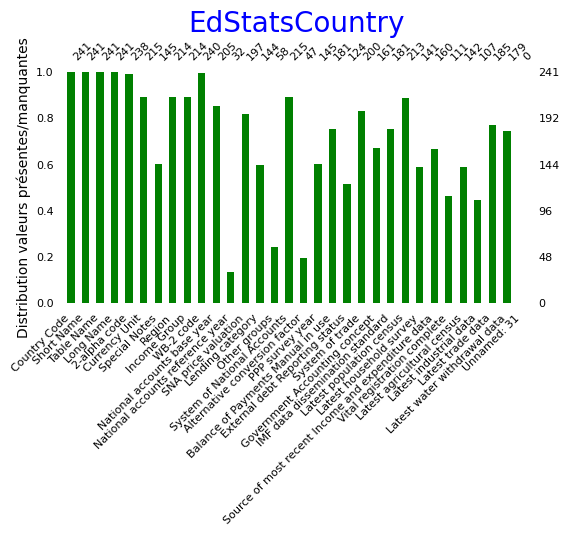

In [91]:
fig, ax = plt.subplots(figsize=(6,3))
msno.bar(EdStatsCountry, color="green", ax=ax, fontsize=8)
ax.set_title("EdStatsCountry")
ax.title.set_color('blue')
ax.title.set_size(20)
ax.set_ylabel("Distribution valeurs présentes/manquantes")
plt.show()

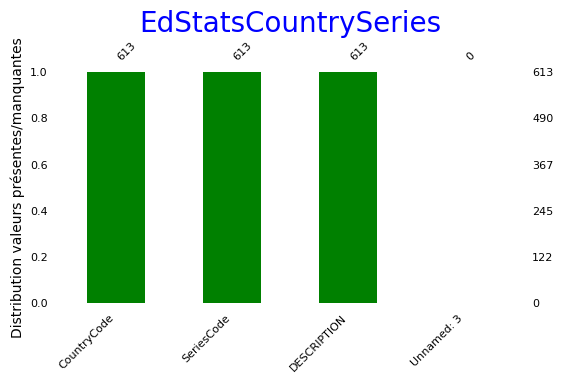

In [92]:
fig, ax = plt.subplots(figsize=(6,3))
msno.bar(EdStatsCountrySeries, color="green", ax=ax, fontsize=8)
ax.set_title("EdStatsCountrySeries")
ax.title.set_size(20)
ax.title.set_color('blue')
ax.set_ylabel("Distribution valeurs présentes/manquantes")
plt.show()

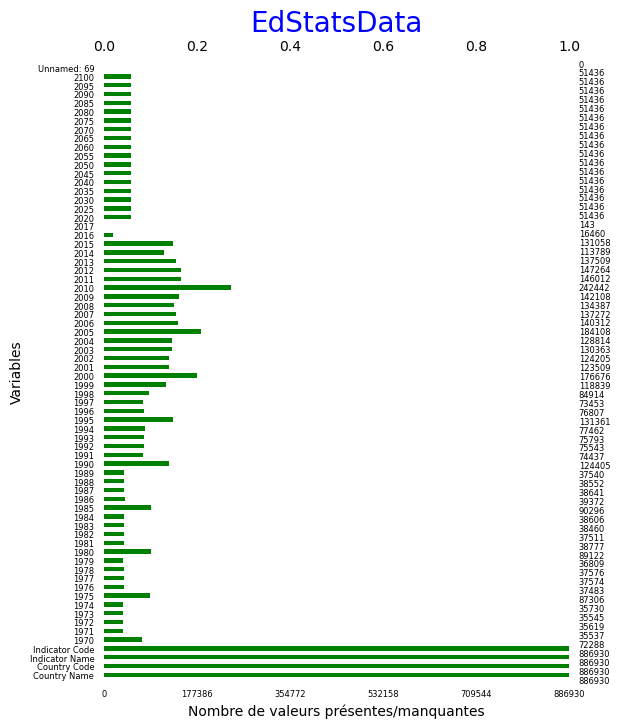

In [93]:
fig, ax = plt.subplots(figsize=(6,8))
msno.bar(EdStatsData, color="green", ax=ax, fontsize=6)
ax.set_title("EdStatsData")
ax.title.set_color('blue')
ax.title.set_size(20)
ax.set_xlabel("Nombre de valeurs présentes/manquantes")
ax.set_ylabel("Variables")
plt.show()

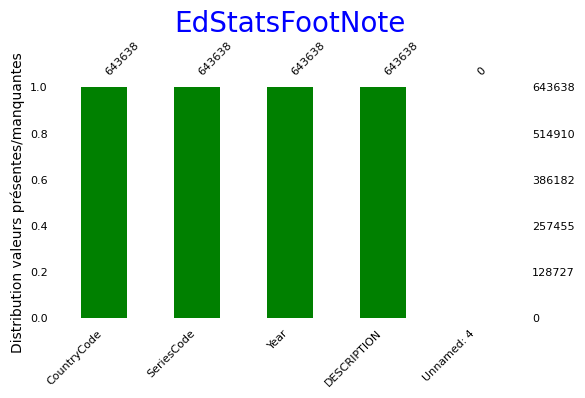

In [94]:
fig, ax = plt.subplots(figsize=(6,3))
msno.bar(EdStatsFootNote, color="green", ax=ax, fontsize=8)
ax.set_title("EdStatsFootNote")
ax.title.set_size(20)
ax.title.set_color('blue')
ax.set_ylabel("Distribution valeurs présentes/manquantes")
plt.show()

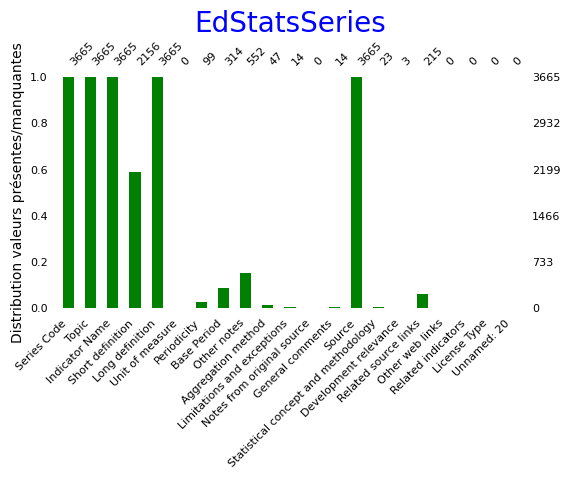

In [95]:
fig, ax = plt.subplots(figsize=(6,3))
msno.bar(EdStatsSeries, color="green", ax=ax, fontsize=8)
ax.set_title("EdStatsSeries")
ax.title.set_size(20)
ax.title.set_color('blue')
ax.set_ylabel("Distribution valeurs présentes/manquantes")
plt.show()

<u>**Conclusion</u>**:

**EdstatsData**, le dataframe qui contient le plus de données pertinentes pour notre étude comporte de **très nombreuses valeurs manquantes.**                                                         
Un traitement de ces erreurs est décrit dans la partie 1.6 (Filtrage des variables choisies)

# <a name="C4">1.4 Qualité du jeu de données - doublons</a>

Pour vérifier la présence de doublons au sein de nos dataframes, nous devons d'abord identifier quelles sont les variables ou ensembles de
variables qui ne devraient pas être doublés pour chaque dataframe.

### 1. EdStatsCountry: 
La variable 'Country Code' devrait être unique. 

In [96]:
EdStatsCountry.loc[EdStatsCountry['Country Code'].duplicated(keep=False),:]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


### 2. EdStatsCountrySeries: 
Sur les variables ['CountryCode','SeriesCode'], il n'est normalement pas possible d'avoir des doublons

In [97]:
EdStatsCountrySeries.loc[EdStatsCountrySeries[['CountryCode','SeriesCode']].duplicated(keep=False),:]

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3


### 3. EdStatsData: 
Sur les variables ['Country Code','Indicator Code'], il n'est normalement pas possible d'avoir des doublons

In [98]:
EdStatsData.loc[EdStatsData[['Country Code','Indicator Code']].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


### 4. EdStatsFootNote: 
Sur les variables [['CountryCode','SeriesCode','Year']], il n'est normalement pas possible d'avoir des doublons

In [99]:
EdStatsFootNote.loc[EdStatsFootNote[['CountryCode','SeriesCode','Year']].duplicated(keep=False),:]

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4


### 5. EdStatsSeries: 
La variable 'Series Code' devrait être unique.

In [100]:
EdStatsSeries.loc[EdStatsSeries['Series Code'].duplicated(keep=False),:]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


<u>**Conclusion:**</u> 

**Pas de doublons dans le jeu de données importé**

# <a name="C5">1.5 Choix des variables</a>

Afin d'identifier les pays les plus pertinents pour le développement commercial d'Academy, les 5 variables suivantes sont sélectionnées,
parmi les plus de 4000 indicateurs d'EdStats décrits sur le site de la banque mondiale.
 
            
|  Indicator Name                                          | Indicator Code       | Description                                                       | Justification |
|----------------------------------------------------------|----------------------|-------------------------------------------------------------------|-------------- |
| **Internet users (per 100 people)**                      | IT.NET.USER.P2       |Nombre d'utilisateurs d'internet pour 100 habitants.               |Les formations en lignes nécessitent une connexion internet  |
| **Population, ages 15-24, total**                        | SP.POP.1524.TO.UN    |Nombre d'habitants âgés de 15 à 24 ans                             |Les pays ciblés devront compter suffisamment de jeunes|
| **Enrolment in secondary education, both sexes (number)**  | SE.SEC.ENRL            |Nombre d'élèves inscrits dans le secondaire                    |Les formations s'adressent à un public de niveau lycée et université|
| **Enrolment in tertiary education, all programmes, both sexes (number)**  | SE.TER.ENRL            |Nombre d'élèves inscrits dans l'enseignement supérieur      |Les formations s'adressent à un public de niveau lycée et université|
| **GDP per capita (current US$)**                         | NY.GDP.PCAP.CD       |Produit Intérieur Brut par habitant                                |Formations payantes. Le développement commercial nécessite un PIB/hab suffisant |

=> Ces 5 variables sont toutes présentes dans le fichier EdStatsData.csv

Nom simplifié de ces variables dans notre analyse:
- Internet_Users
- Population15to24
- Enrolment_Secondary
- Enrolment_Tertiary
- PIB_hab

Utilisation des Indicator Codes dans les scripts.

# <a name="C6">1.6: Filtrage des variables choisies</a>

La plus grande partie des données pertinentes (y compris nos 5 variables sélectionnées) sont présentes dans le fichier EdStatsData.csv                                                                                                                
Les traitements / filtrages se feront donc à partir de ce fichier.

### 1. Filtrage des 5 variables d'EdStatsData

Parmi les 886930 lignes du data frame EdStatsData, on ne garde que celles qui concernent les 5 variables pour créer 5 dataframes. 

In [101]:
# Création du data frame Data_Internet_Users 
Data_Internet_Users=EdStatsData.loc[EdStatsData['Indicator Code'] == 'IT.NET.USER.P2', :]
Data_Internet_Users.reset_index(drop=True,inplace=True)
Data_Internet_Users.head()
Data_Internet_Users.shape

(242, 70)

In [102]:
# Création du data frame Data_Population15to24
Data_Population15to24=EdStatsData.loc[EdStatsData['Indicator Code'] == 'SP.POP.1524.TO.UN', :]
Data_Population15to24.reset_index(drop=True,inplace=True)
Data_Population15to24.shape

(242, 70)

In [103]:
# Création du data frame Data_Enrolment_Secondary
Data_Enrolment_Secondary=EdStatsData.loc[EdStatsData['Indicator Code'] == 'SE.SEC.ENRL', :]
Data_Enrolment_Secondary.reset_index(drop=True,inplace=True)
Data_Enrolment_Secondary.shape

(242, 70)

In [104]:
# Création du data frame Data_Enrolment_Tertiary
Data_Enrolment_Tertiary=EdStatsData.loc[EdStatsData['Indicator Code'] == 'SE.TER.ENRL', :]
Data_Enrolment_Tertiary.reset_index(drop=True,inplace=True)
Data_Enrolment_Tertiary.shape

(242, 70)

In [105]:
# Création du data frame Data_PIB_hab
Data_PIB_hab=EdStatsData.loc[EdStatsData['Indicator Code'] == 'NY.GDP.PCAP.CD', :]
Data_PIB_hab.reset_index(drop=True,inplace=True)
Data_PIB_hab.shape

(242, 70)

### 2. Filtrage des dates - fonction qui récupère la dernière valeur non nulle d'une variable

Les 5 dataframes contiennent de nombreuses valeurs manquantes pour les années 1970 à 2100.
Le but de la fonction suivante est de récupérer et stocker dans une série la dernière valeur non nulle d'une variable, pour chaque pays.
Une colonne (dont le nom est l'indicator passé en argument) est alors créé à la fin du dataframe. Cette colonne contient la série de dernières valeurs non nulle pour chaque pays.
La fonction prend en argument le Data frame, Indicator.
        

In [106]:
def latest_valid_value (Dataframe,Indicator):
    print("Création d'une série de valeurs pour l'indicateur",Indicator)
    line=0 #première ligne du data frame
    serie_name=pd.Series([], dtype='object') #création d'une série vide
    for line in Dataframe.index:  # on parcourt les lignes du data frame
        colonne=1 # nous servira pour partir de la derniere colonne du df (-1)
        while pd.isnull(Dataframe.iloc[line, -colonne]): # tant que la valeur df[line,j] est manquante
            colonne=colonne+1                            # on remonte les colonnes (vers une date plus récente)
        if type(Dataframe.iloc[line, -colonne]) == np.float64: # la valeur de la variable doit être décimale 
            serie_name = pd.concat([serie_name, pd.Series([Dataframe.iloc[line,-colonne]])],ignore_index=True) #on ajoute la valeur dans la série 
        else:
            serie_name = pd.concat([serie_name, pd.Series(np.NaN)]) #sinon, on ajoute NaN dans la série
        line=line+1 # on passe à la ligne suivante
    serie_name.reset_index(drop=True,inplace=True)
    Dataframe[Indicator]=serie_name
    display(serie_name)

Execution de la fonction latest_valid_value pour les 5 dataframes:

In [107]:
latest_valid_value(Data_Internet_Users,'Internet_Users')
latest_valid_value(Data_Population15to24,'Population15to24')
latest_valid_value(Data_Enrolment_Secondary,'Enrolment_Secondary')
latest_valid_value(Data_Enrolment_Tertiary,'Enrolment_Tertiary')
latest_valid_value(Data_PIB_hab,'PIB_hab')

Création d'une série de valeurs pour l'indicateur Internet_Users


C:\Users\Vincent-Formation\AppData\Local\Temp\ipykernel_13296\4113034623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[Indicator]=serie_name


0      36.868602
1      52.796321
2      48.386621
3      80.446726
4      73.914751
         ...    
237    59.608316
238    61.178385
239    24.579208
240    25.506579
241    23.119989
Length: 242, dtype: float64

Création d'une série de valeurs pour l'indicateur Population15to24


C:\Users\Vincent-Formation\AppData\Local\Temp\ipykernel_13296\4113034623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[Indicator]=serie_name


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
237          NaN
238    1053004.0
239    5995687.0
240    3068044.0
241    3333716.0
Length: 242, dtype: float64

Création d'une série de valeurs pour l'indicateur Enrolment_Secondary


C:\Users\Vincent-Formation\AppData\Local\Temp\ipykernel_13296\4113034623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[Indicator]=serie_name


0       30972246.0
1      154212112.0
2      139756448.0
3       28055416.0
4       78143392.0
          ...     
237        12900.0
238       721414.0
239      1768102.0
240       208640.0
241       957461.0
Length: 242, dtype: float64

Création d'une série de valeurs pour l'indicateur Enrolment_Tertiary


C:\Users\Vincent-Formation\AppData\Local\Temp\ipykernel_13296\4113034623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[Indicator]=serie_name


0       9966484.0
1      69097800.0
2      59809028.0
3      13041961.0
4      37693412.0
          ...    
237        2488.0
238      221018.0
239      267498.0
240       56680.0
241      135575.0
Length: 242, dtype: float64

C:\Users\Vincent-Formation\AppData\Local\Temp\ipykernel_13296\4113034623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[Indicator]=serie_name


Création d'une série de valeurs pour l'indicateur PIB_hab


0       7715.998677
1       9787.775545
2       6586.833593
3      35008.049004
4      22230.203651
           ...     
237    36350.821635
238     2943.404534
239      990.334774
240     1269.573537
241     1029.076649
Length: 242, dtype: float64

### 3. Filtrage des colonnes des 5 dataframes

Pour chacun des 5 dataframes, on garde les colonne 'Country Code' et la dernière colonne ajoutée dans l'étape précédente. 

In [108]:
Data_Internet_Users=Data_Internet_Users.loc[:,['Country Code','Country Name','Internet_Users']]
Data_Internet_Users.head()

,Country Code,Country Name,Internet_Users
0,ARB,Arab World,36.868602
1,EAS,East Asia & Pacific,52.796321
2,EAP,East Asia & Pacific (excluding high income),48.386621
3,EMU,Euro area,80.446726
4,ECS,Europe & Central Asia,73.914751


In [109]:
Data_Population15to24=Data_Population15to24.loc[:,['Country Code','Population15to24']]
Data_Population15to24.head()

,Country Code,Population15to24
0,ARB,NaN
1,EAS,NaN
2,EAP,NaN
3,EMU,NaN
4,ECS,NaN


In [110]:
Data_Enrolment_Secondary=Data_Enrolment_Secondary.loc[:,['Country Code','Enrolment_Secondary']]
Data_Enrolment_Secondary.head()


,Country Code,Enrolment_Secondary
0,ARB,30972246.0
1,EAS,154212112.0
2,EAP,139756448.0
3,EMU,28055416.0
4,ECS,78143392.0


In [111]:
Data_Enrolment_Tertiary=Data_Enrolment_Tertiary.loc[:,['Country Code','Enrolment_Tertiary']]
Data_Enrolment_Tertiary.head()

,Country Code,Enrolment_Tertiary
0,ARB,9966484.0
1,EAS,69097800.0
2,EAP,59809028.0
3,EMU,13041961.0
4,ECS,37693412.0


In [112]:
Data_PIB_hab=Data_PIB_hab.loc[:,['Country Code','PIB_hab']]
Data_PIB_hab.head()

,Country Code,PIB_hab
0,ARB,7715.998677
1,EAS,9787.775545
2,EAP,6586.833593
3,EMU,35008.049004
4,ECS,22230.203651


# <a name="C7">1.7: Fusion des données filtrées</a>

Le but de ce traitement est de fusionner nos 5 dataframes en 1 seul dataframe contenant les 5 variables sélectionnées pour l'ensemble des pays.

In [113]:
Data=pd.merge(Data_Internet_Users, Data_Population15to24, on='Country Code', how='inner')
Data.head()

,Country Code,Country Name,Internet_Users,Population15to24
0,ARB,Arab World,36.868602,NaN
1,EAS,East Asia & Pacific,52.796321,NaN
2,EAP,East Asia & Pacific (excluding high income),48.386621,NaN
3,EMU,Euro area,80.446726,NaN
4,ECS,Europe & Central Asia,73.914751,NaN


In [114]:
Data=pd.merge(Data, Data_Enrolment_Secondary, on='Country Code', how='inner')
Data.head()

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary
0,ARB,Arab World,36.868602,NaN,30972246.0
1,EAS,East Asia & Pacific,52.796321,NaN,154212112.0
2,EAP,East Asia & Pacific (excluding high income),48.386621,NaN,139756448.0
3,EMU,Euro area,80.446726,NaN,28055416.0
4,ECS,Europe & Central Asia,73.914751,NaN,78143392.0


In [115]:
Data=pd.merge(Data, Data_Enrolment_Tertiary, on='Country Code', how='inner')
Data.head()

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary
0,ARB,Arab World,36.868602,NaN,30972246.0,9966484.0
1,EAS,East Asia & Pacific,52.796321,NaN,154212112.0,69097800.0
2,EAP,East Asia & Pacific (excluding high income),48.386621,NaN,139756448.0,59809028.0
3,EMU,Euro area,80.446726,NaN,28055416.0,13041961.0
4,ECS,Europe & Central Asia,73.914751,NaN,78143392.0,37693412.0


In [116]:
Data=pd.merge(Data, Data_PIB_hab, on='Country Code', how='inner')
print(Data.shape)
Data.head()

(242, 7)


,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
0,ARB,Arab World,36.868602,NaN,30972246.0,9966484.0,7715.998677
1,EAS,East Asia & Pacific,52.796321,NaN,154212112.0,69097800.0,9787.775545
2,EAP,East Asia & Pacific (excluding high income),48.386621,NaN,139756448.0,59809028.0,6586.833593
3,EMU,Euro area,80.446726,NaN,28055416.0,13041961.0,35008.049004
4,ECS,Europe & Central Asia,73.914751,NaN,78143392.0,37693412.0,22230.203651


**Le dataframe Data contient bien les 5 variables sélectionnées pour l'ensemble des pays.**

# <a name="C8">1.8 Validation des données nettoyées</a>

### 1. Filtrage des petits pays

Le développement commercial d'Academy ne sera pas possible dans les plus petits pays.

Fixons un seuil sur la population de jeunes (15-24 ans) à 130 000 habitants pour vérifier le remplissage des variables de Data.

In [117]:
Data.loc[Data['Population15to24'] > 130000,:].shape
Data=Data.loc[Data['Population15to24'] > 130000,:]

Vérification des valeurs manquantes dans Data:

In [118]:
Data.isnull().sum()

Country Code           0
Country Name           0
Internet_Users         0
Population15to24       0
Enrolment_Secondary    0
Enrolment_Tertiary     0
PIB_hab                1
dtype: int64

Après application du filtre sur la population jeune minimale, il reste un pays avec valeur manquante, la Coré du Nord qui peut être
écarté pour des raisons géopolitiques qui rendent un développement commercial trop complexe.

In [119]:
Data.loc[Data['PIB_hab'].isnull(),:]

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
127,PRK,"Korea, Dem. People’s Rep.",0.0,4023348.0,2148364.0,565350.0,NaN


Supression de la Corée du Nord

In [120]:
Data=Data.loc[Data['Country Code'].ne('PRK'),:]

### 2. Vérification après traitement des données manquantes

In [121]:
print(Data.shape)
Data.isnull().sum()

(156, 7)


Country Code           0
Country Name           0
Internet_Users         0
Population15to24       0
Enrolment_Secondary    0
Enrolment_Tertiary     0
PIB_hab                0
dtype: int64

**En fixant ce seuil minimum à 130 000 pour la population jeune, les données sont exploitables pour les 5 variables choisies, pour 156 pays**.

# <a name="C11">2.1 Analyse univariée</a>

# <a name="C111">2.1.1 Variable Internet_Users</a>

Calcul des indicateurs statistiques pour la variable Internet_Users (nombre d'utilisateurs internet pour 100 habitants)

In [122]:
# moyenne
print("Moyenne de la variable Internet_Users:", round(Data['Internet_Users'].mean(),2))

Moyenne de la variable Internet_Users: 47.6


In [123]:
# médiane
print("Médiane de la variable Internet_Users:", round(Data['Internet_Users'].median(),2))

Médiane de la variable Internet_Users: 47.78


In [124]:
# Ecart type:
print("L'écart type de la variable Internet_Users:", round(Data['Internet_Users'].std(),2))

L'écart type de la variable Internet_Users: 28.38


In [125]:
# Calcul des quantiles de distribution:
Q1=round(Data['Internet_Users'].quantile(0.25),2)
Q2=round(Data['Internet_Users'].quantile(0.5),2)
Q3=round(Data['Internet_Users'].quantile(0.75),2)
print("Q1 (0,25):",Q1)
print("Q2 (0,5):",Q2)
print("Q3 (0,75):",Q3)

Q1 (0,25): 22.17
Q2 (0,5): 47.78
Q3 (0,75): 73.3


# <a name="C112">2.1.2 Variable Population15to24</a>

Calcul des indicateurs statistiques pour la variable Population15to24 (nombre d'habitants âgés de 15 à 24 ans)

In [126]:
# moyenne
print("Moyenne de la variable Population15to24:", int(Data['Population15to24'].mean()),"habitants")

Moyenne de la variable Population15to24: 7686035 habitants


In [127]:
# médiane
print("Médiane de la variable Population15to24:", int(Data['Population15to24'].median()),"habitants")

Médiane de la variable Population15to24: 1984050 habitants


In [128]:
# Ecart type:
print("L'écart type de la variable Population15to24:", int(Data['Population15to24'].std()))

L'écart type de la variable Population15to24: 25754919


In [129]:
# Calcul des quantiles de distribution:
Q1_pop=Data['Population15to24'].quantile(0.25)
Q2_pop=Data['Population15to24'].quantile(0.5)
Q3_pop=Data['Population15to24'].quantile(0.75)
IQ_pop=Q3_pop-Q1_pop
print("Q1 Population15to24 (0,25):",Q1)
print("Q2 Population15to24 (0,5):",Q2)
print("Q3 Population15to24 (0,75):",Q3)

Q1 Population15to24 (0,25): 22.17
Q2 Population15to24 (0,5): 47.78
Q3 Population15to24 (0,75): 73.3


# <a name="C113">2.1.3 Variable Enrolment_Secondary</a>

Calcul des indicateurs statistiques pour la variable Enrolment_Secondary (nombre d'élèves inscrits dans le secondaire)

In [130]:
# moyenne
print("Moyenne de la variable Enrolment_Secondary:", int(Data['Enrolment_Secondary'].mean()),"élèves")

Moyenne de la variable Enrolment_Secondary: 3705644 élèves


In [131]:
# médiane
print("Médiane de la variable Enrolment_Secondary:", int(Data['Enrolment_Secondary'].median()),"élèves")

Médiane de la variable Enrolment_Secondary: 802188 élèves


In [132]:
# Ecart type:
print("L'écart type de la variable Enrolment_Secondary:", int(Data['Enrolment_Secondary'].std()))

L'écart type de la variable Enrolment_Secondary: 12818137


In [133]:
# Calcul des quantiles de distribution:
Q1_sec=Data['Enrolment_Secondary'].quantile(0.25)
Q2_sec=Data['Enrolment_Secondary'].quantile(0.5)
Q3_sec=Data['Enrolment_Secondary'].quantile(0.75)
IQ_sec=Q3_sec-Q1_sec
print("Q1 Enrolment_Secondary (0,25):",Q1_sec)
print("Q2 Enrolment_Secondary (0,5):",Q2_sec)
print("Q3 Enrolment_Secondary (0,75):",Q3_sec)

Q1 Enrolment_Secondary (0,25): 306813.25
Q2 Enrolment_Secondary (0,5): 802188.5
Q3 Enrolment_Secondary (0,75): 2614519.5


# <a name="C114">2.1.4 Variable Enrolment_Tertiary</a>

Calcul des indicateurs statistiques pour la variable Enrolment_Tertiary (nombre d'élèves inscrits dans l'enseignement supérieur)

In [134]:
# moyenne
print("Moyenne de la variable Enrolment_Tertiary:", int(Data['Enrolment_Tertiary'].mean()),"élèves")

Moyenne de la variable Enrolment_Tertiary: 1351752 élèves


In [135]:
# médiane
print("Médiane de la variable Enrolment_Tertiary:", int(Data['Enrolment_Tertiary'].median()),"élèves")

Médiane de la variable Enrolment_Tertiary: 258380 élèves


In [136]:
# Ecart type:
print("L'écart type de la variable Enrolment_Tertiary:", int(Data['Enrolment_Tertiary'].std()))

L'écart type de la variable Enrolment_Tertiary: 4655468


In [137]:
# Calcul des quantiles de distribution:
Q1_ter=Data['Enrolment_Tertiary'].quantile(0.25)
Q2_ter=Data['Enrolment_Tertiary'].quantile(0.5)
Q3_ter=Data['Enrolment_Tertiary'].quantile(0.75)
IQ_ter=Q3_ter-Q1_ter
print("Q1 Enrolment_Tertiary (0,25):",Q1_ter)
print("Q2 Enrolment_Tertiary (0,5):",Q2_ter)
print("Q3 Enrolment_Tertiary (0,75):",Q3_ter)

Q1 Enrolment_Tertiary (0,25): 93701.5
Q2 Enrolment_Tertiary (0,5): 258380.5
Q3 Enrolment_Tertiary (0,75): 761100.5


# <a name="C115">2.1.5 Variable PIB_hab</a>

In [138]:
# moyenne
print("Moyenne de la variable PIB_hab:", int(Data['PIB_hab'].mean()),"dollars")

Moyenne de la variable PIB_hab: 11612 dollars


In [139]:
# médiane
print("Médiane de la variable PIB_hab:", int(Data['PIB_hab'].median()),"dollars")

Médiane de la variable PIB_hab: 4185 dollars


In [140]:
# Ecart type:
print("L'écart type de la variable PIB_hab:", int(Data['PIB_hab'].std()))

L'écart type de la variable PIB_hab: 16303


In [141]:
# Calcul des quantiles de distribution:
Q1_PIB=round(Data['PIB_hab'].quantile(0.25),2)
Q2_PIB=round(Data['PIB_hab'].quantile(0.5),2)
Q3_PIB=round(Data['PIB_hab'].quantile(0.75),2)
IQ_PIB=Q3_PIB-Q1_PIB
print("Q1 PIB (0,25):",Q1_PIB)
print("Q2 PIB (0,5):",Q2_PIB)
print("Q3 PIB (0,75):",Q3_PIB)

Q1 PIB (0,25): 1397.67
Q2 PIB (0,5): 4185.16
Q3 PIB (0,75): 13860.86


# <a name="C12">2.2 Détection et traitement des outliers</a>

# <a name="C121">2.2.1 Approche statistique (méthode interquartile)</a>

L'écart interquartile est la différence entre le 3e quartile et le 1er quartile (IQ=Q3−Q1)

Des valeurs sont considérées comme des outliers si au-dessous de  Q1−1.5IQ ou au-dessus de Q3+1.5IQ

Vérifions la présence d'outliers en affichant les boxplot pour chaque variable.

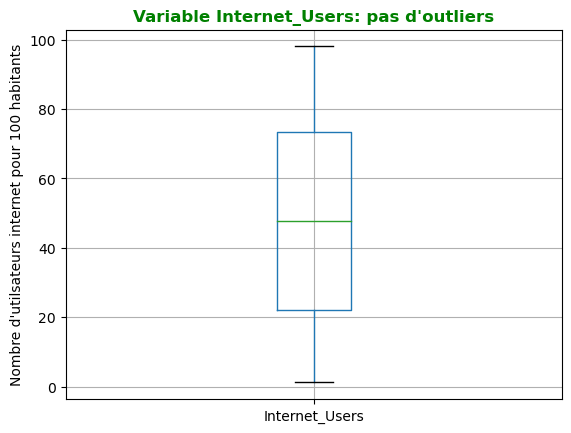

In [142]:
Data.boxplot(column="Internet_Users", vert=True)
plt.title("Variable Internet_Users: pas d'outliers", fontweight='bold', color='green')
plt.ylabel("Nombre d'utilsateurs internet pour 100 habitants")
plt.show()

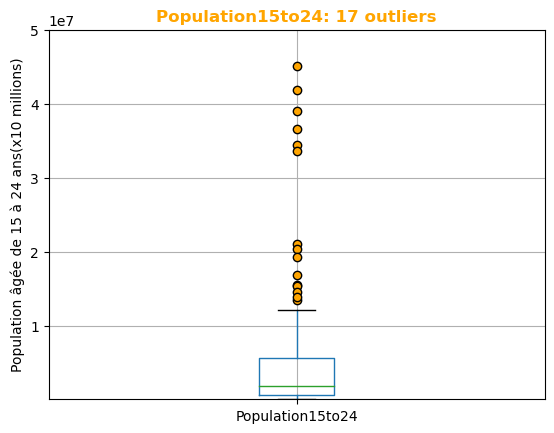

In [143]:
Data.boxplot(column="Population15to24", vert=True,flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title("Population15to24: 17 outliers", fontweight='bold', color='orange')
plt.ylabel("Population âgée de 15 à 24 ans(x10 millions)")
plt.ylim(125000,50000000) # pour une meilleure lisibilité, zoom sur 125000 (filtre seuil minimum) et 50 millions => certains outliers n'appraissent pas
plt.show()

In [144]:
Data[Data['Population15to24'] > (Q3_pop + 1.5*IQ_pop)]

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
40,BGD,Bangladesh,18.246938,34400594.0,14566771.0,2068355.0,1358.779029
51,BRA,Brazil,59.682747,33595574.0,23501784.0,8285475.0,8649.948492
66,CHN,China,53.200000,197026759.0,86127200.0,43367392.0,8123.180873
69,COD,"Congo, Dem. Rep.",6.209974,15535095.0,4388456.0,442979.0,405.542501
83,EGY,"Egypt, Arab Rep.",39.213813,15377746.0,8208329.0,2868912.0,3477.851743
88,ETH,Ethiopia,15.366924,21074230.0,5028678.0,757175.0,706.757475
113,IND,India,29.547163,244120201.0,129542056.0,32107420.0,1709.591808
114,IDN,Indonesia,25.366301,41819264.0,23756316.0,5107999.0,3570.294888
115,IRN,"Iran, Islamic Rep.",53.226773,13556577.0,5712478.0,4802721.0,5219.109408
152,MEX,Mexico,59.540446,20336734.0,12993322.0,3419391.0,8208.555984


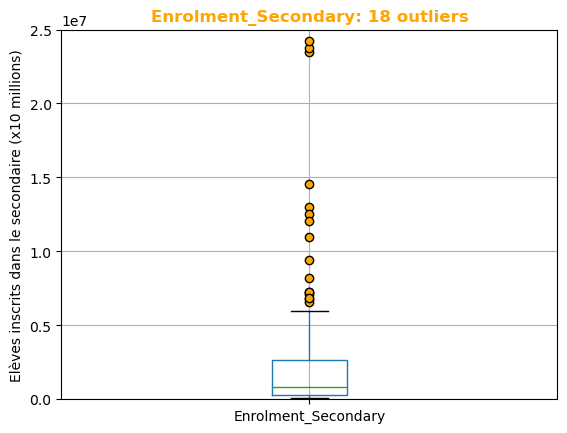

In [145]:
Data.boxplot(column="Enrolment_Secondary", vert=True,flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title("Enrolment_Secondary: 18 outliers", fontweight='bold', color='orange')
plt.ylabel("Elèves inscrits dans le secondaire (x10 millions)")
plt.ylim(0,25000000) # zoom sur 0 - 25 millions
plt.show()

In [146]:
Data[Data['Enrolment_Secondary'] > (Q3_sec + 1.5*IQ_sec)]

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
40,BGD,Bangladesh,18.246938,34400594.0,14566771.0,2068355.00,1358.779029
51,BRA,Brazil,59.682747,33595574.0,23501784.0,8285475.00,8649.948492
66,CHN,China,53.200000,197026759.0,86127200.0,43367392.00,8123.180873
83,EGY,"Egypt, Arab Rep.",39.213813,15377746.0,8208329.0,2868912.00,3477.851743
97,DEU,Germany,89.647101,8682394.0,7112949.5,2977781.00,42069.597987
113,IND,India,29.547163,244120201.0,129542056.0,32107420.00,1709.591808
114,IDN,Indonesia,25.366301,41819264.0,23756316.0,5107999.00,3570.294888
122,JPN,Japan,92.000000,12157426.0,7227485.0,3862460.00,38900.569306
152,MEX,Mexico,59.540446,20336734.0,12993322.0,3419391.00,8208.555984
169,NGA,Nigeria,25.670000,36659023.0,12532753.0,1513371.00,2175.673442


In [147]:
Data[Data['Enrolment_Tertiary'] > (Q3_ter + 1.5*IQ_ter)]

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
32,ARG,Argentina,70.150764,6886530.0,4450741.0,2869450.00,12440.320982
40,BGD,Bangladesh,18.246938,34400594.0,14566771.0,2068355.00,1358.779029
51,BRA,Brazil,59.682747,33595574.0,23501784.0,8285475.00,8649.948492
66,CHN,China,53.200000,197026759.0,86127200.0,43367392.00,8123.180873
67,COL,Colombia,58.136494,8999338.0,4793963.0,2293550.00,5805.605385
83,EGY,"Egypt, Arab Rep.",39.213813,15377746.0,8208329.0,2868912.00,3477.851743
92,FRA,France,85.622200,7567872.0,5947212.0,2388880.00,36854.968280
97,DEU,Germany,89.647101,8682394.0,7112949.5,2977781.00,42069.597987
113,IND,India,29.547163,244120201.0,129542056.0,32107420.00,1709.591808
114,IDN,Indonesia,25.366301,41819264.0,23756316.0,5107999.00,3570.294888


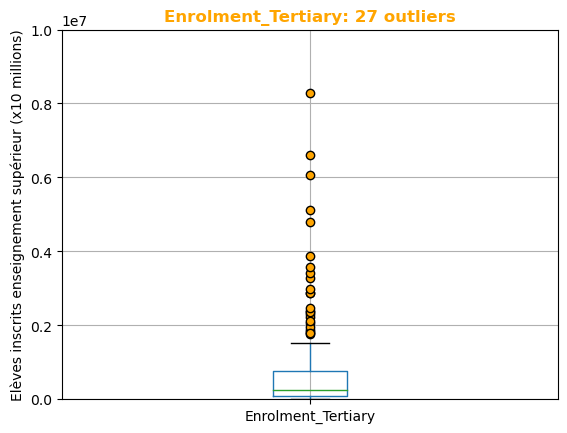

In [148]:
Data.boxplot(column="Enrolment_Tertiary", vert=True,flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title("Enrolment_Tertiary: 27 outliers", fontweight='bold', color='orange')
plt.ylabel("Elèves inscrits enseignement supérieur (x10 millions)")
plt.ylim(0,10000000) # zoom sur 0 - 10 millions
plt.show()

In [149]:
Data[Data['Enrolment_Tertiary'] > (Q3_ter + 1.5*IQ_ter)]

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
32,ARG,Argentina,70.150764,6886530.0,4450741.0,2869450.00,12440.320982
40,BGD,Bangladesh,18.246938,34400594.0,14566771.0,2068355.00,1358.779029
51,BRA,Brazil,59.682747,33595574.0,23501784.0,8285475.00,8649.948492
66,CHN,China,53.200000,197026759.0,86127200.0,43367392.00,8123.180873
67,COL,Colombia,58.136494,8999338.0,4793963.0,2293550.00,5805.605385
83,EGY,"Egypt, Arab Rep.",39.213813,15377746.0,8208329.0,2868912.00,3477.851743
92,FRA,France,85.622200,7567872.0,5947212.0,2388880.00,36854.968280
97,DEU,Germany,89.647101,8682394.0,7112949.5,2977781.00,42069.597987
113,IND,India,29.547163,244120201.0,129542056.0,32107420.00,1709.591808
114,IDN,Indonesia,25.366301,41819264.0,23756316.0,5107999.00,3570.294888


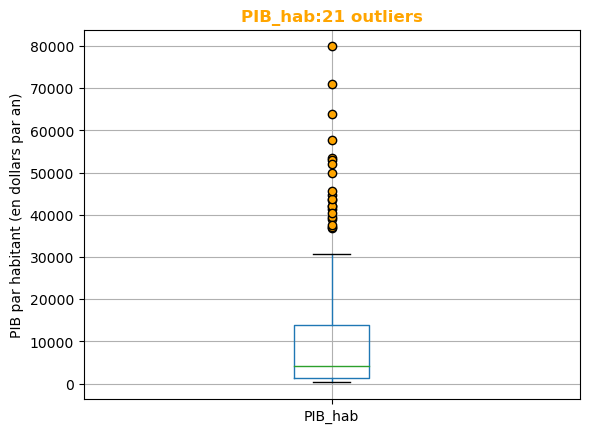

In [150]:
Data.boxplot(column="PIB_hab", vert=True,flierprops=dict(markerfacecolor='orange', marker='o'))
plt.title("PIB_hab:21 outliers", fontweight='bold', color='orange')
plt.ylabel("PIB par habitant (en dollars par an)")
plt.show()

In [151]:
Data[Data['PIB_hab'] > (Q3_PIB + 1.5*Q3_PIB)]

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
35,AUS,Australia,88.238658,2914620.0,2.371284e+06,1.453521e+06,49927.819509
36,AUT,Austria,84.323331,964629.0,6.910712e+05,4.259717e+05,44676.345835
43,BEL,Belgium,86.516500,1241946.0,1.217912e+06,5.047450e+05,41236.266589
60,CAN,Canada,89.840000,4373511.0,2.697507e+06,1.212161e+06,42157.927991
78,DNK,Denmark,96.967785,710024.0,5.532630e+05,3.137560e+05,53549.700671
91,FIN,Finland,87.703650,639391.0,5.400670e+05,3.024780e+05,43402.863264
92,FRA,France,85.622200,7567872.0,5.947212e+06,2.388880e+06,36854.968280
97,DEU,Germany,89.647101,8682394.0,7.112950e+06,2.977781e+06,42069.597987
110,HKG,"Hong Kong SAR, China",87.300343,856743.0,3.939520e+05,2.986427e+05,43681.421951
117,IRL,Ireland,82.169700,580379.0,3.546700e+05,2.146320e+05,63861.921982


**Conclusion**: La méthode interquartile détecte de nombreux outliers pour 4 des 5 variables sélectionnées


# <a name="C122">2.2.2 Approche métier</a>

Vérifions le minimum et le maximum de chaque variable avec la méthode describe:

In [152]:
Data.describe()

,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,156.000000
mean,47.596267,7.686036e+06,3.705644e+06,1.351753e+06,11612.918756
std,28.381641,2.575492e+07,1.281814e+07,4.655468e+06,16303.193158
min,1.177119,1.326090e+05,5.517600e+04,3.689000e+03,285.727442
25%,22.168370,7.022945e+05,3.068132e+05,9.370150e+04,1397.668952
50%,47.778620,1.984050e+06,8.021885e+05,2.583805e+05,4185.164354
75%,73.297881,5.666144e+06,2.614520e+06,7.611005e+05,13860.859728
max,97.999981,2.441202e+08,1.295421e+08,4.336739e+07,79890.524005


Le minimum et le maximum de chaque variable indiquent que les outliers détectés ne sont pas des valeurs abérrantes, mais
des **valeurs atypiques**.
En effet, il existe réellement de fortes disparités entre pays en terme de PIB_hab et de population 15 à 24 ans et d'inscription dans le secondaire et enseignement supérieur. 

**Conclusion**: pas de traitement des outliers, **les valeurs atypiques doivent être conservées** 

# <a name="C13">2.3 Représentation graphique des distributions</a>

Les 5 variables sélectionnées sont **quantitatives continues**.
Représentons leur distribution à l'aide d'**histogrammes**.

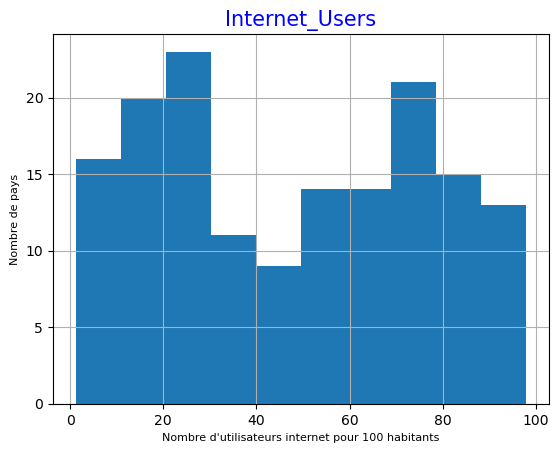

In [153]:
Data["Internet_Users"].hist(bins=10)
plt.title("Internet_Users", fontsize=15, color="blue")
plt.xlabel("Nombre d'utilisateurs internet pour 100 habitants",fontsize=8)
plt.ylabel("Nombre de pays",fontsize=8)
plt.show()

Pour la variable **Internet_Users**, **la distribution est bimodale**, avec un 1er pic à 25% et un 2eme pic 70%

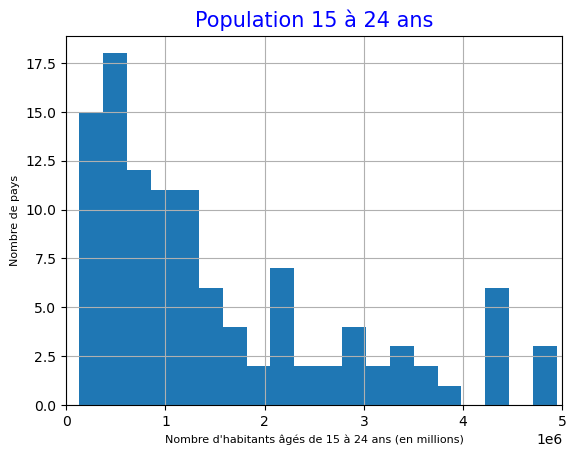

In [154]:
Data[Data.Population15to24 < 5000000]["Population15to24"].hist(bins=20) ## pour une meilleure lisibilité, on retire les pays > 5 millions
plt.title("Population 15 à 24 ans", fontsize=15, color="blue")
plt.xlabel("Nombre d'habitants âgés de 15 à 24 ans (en millions)",fontsize=8)
plt.ylabel("Nombre de pays",fontsize=8)
plt.xlim(0,5000000)
plt.show()

Pour la variable **Population15to24**, **la distribution est unimodale**, avec un pic à 500000 habitants

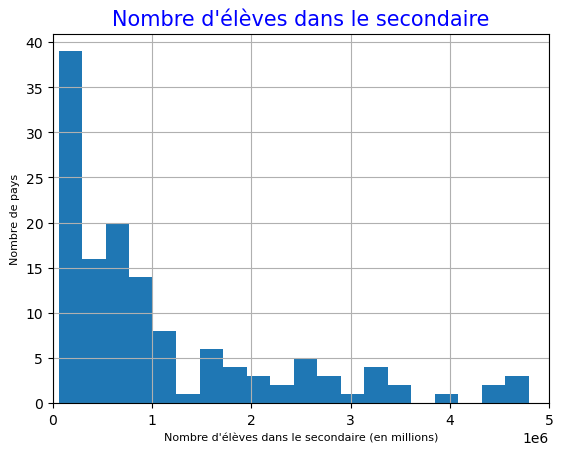

In [155]:
Data[Data.Enrolment_Secondary < 5000000]["Enrolment_Secondary"].hist(bins=20) ## pour une meilleure lisibilité, on retire les pays > 5 millions
plt.title("Nombre d'élèves dans le secondaire", fontsize=15, color="blue")
plt.xlabel("Nombre d'élèves dans le secondaire (en millions)",fontsize=8)
plt.ylabel("Nombre de pays",fontsize=8)
plt.xlim(0,5000000)
plt.show()

Pour la variable **Enrolment_Secondary**, la **distribution est unimodale**, avec un pic à 150000 habitants

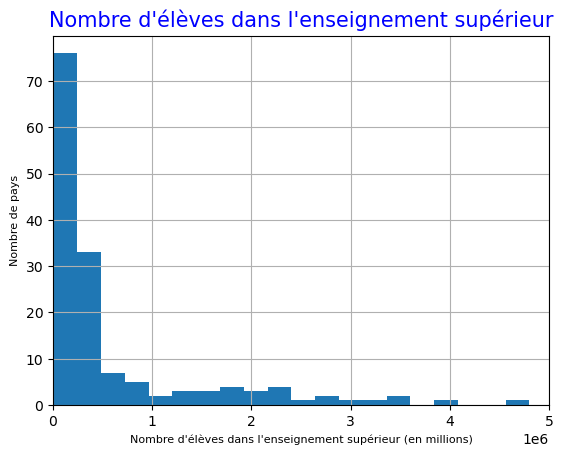

In [156]:
Data[Data.Enrolment_Tertiary < 5000000]["Enrolment_Tertiary"].hist(bins=20) ## pour une meilleure lisibilité, on retire les pays > 5 millions
plt.title("Nombre d'élèves dans l'enseignement supérieur", fontsize=15, color="blue")
plt.xlabel("Nombre d'élèves dans l'enseignement supérieur (en millions)",fontsize=8)
plt.ylabel("Nombre de pays",fontsize=8)
plt.xlim(0,5000000)
plt.show()

Pour la variable **Enrolment_Tertiary**, la **distribution est unimodale**

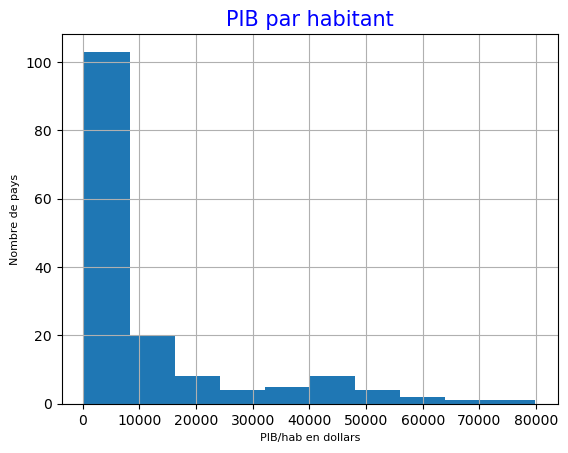

In [157]:
Data["PIB_hab"].hist()
plt.title("PIB par habitant", fontsize=15, color="blue")
plt.xlabel("PIB/hab en dollars",fontsize=8)
plt.ylabel("Nombre de pays",fontsize=8)
plt.show()

Pour la variable **PIB_hab**, la **distribution est unimodale**

# <a name="C14">2.4 Score d'attractivité par pays</a>

Nous allons créer un score d'attractivité pour noter le potentiel d'un pays en fonction des 5 variables retenues.

Afin de comparer et d'analyser plus facilement les indicateurs, une normalisation est nécessaire.

### 1. Normalisation des valeurs des variables

La **normalisation Z-score** permet d'avoir une moyenne à 0 et un écart type à 1.

In [158]:
Data_zscore=Data.loc[:,['Internet_Users','Population15to24','Enrolment_Secondary','Enrolment_Tertiary','PIB_hab']]
Data_zscore = Data_zscore.apply(stats.zscore)

In [159]:
Data_zscore.head()

,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab
25,-1.307877,-0.016876,-0.078800,-0.234646,-0.680034
26,0.663373,-0.277723,-0.265365,-0.256701,-0.460772
27,-0.164392,-0.047453,0.067846,-0.013421,-0.473577
30,-1.222892,-0.133478,-0.220761,-0.243661,-0.511002
32,0.797246,-0.031143,0.058316,0.327053,0.050914


In [160]:
Data['Internet_Users_norm']=Data_zscore['Internet_Users']
Data['Population15to24_norm']=Data_zscore['Population15to24']
Data['Enrolment_Secondary_norm']=Data_zscore['Enrolment_Secondary']
Data['Enrolment_Tertiary_norm']=Data_zscore['Enrolment_Tertiary']
Data['PIB_hab_norm']=Data_zscore['PIB_hab']

In [161]:
Data.head()

,Country Code,Country Name,Internet_Users,Population15to24,Enrolment_Secondary,Enrolment_Tertiary,PIB_hab,Internet_Users_norm,Population15to24_norm,Enrolment_Secondary_norm,Enrolment_Tertiary_norm,PIB_hab_norm
25,AFG,Afghanistan,10.595726,7252785.0,2698816.0,262874.0,561.778746,-1.307877,-0.016876,-0.078800,-0.234646,-0.680034
26,ALB,Albania,66.363445,556269.0,315079.0,160527.0,4124.982390,0.663373,-0.277723,-0.265365,-0.256701,-0.460772
27,DZA,Algeria,42.945527,6467818.0,4572513.0,1289474.0,3916.881571,-0.164392,-0.047453,0.067846,-0.013421,-0.473577
30,AGO,Angola,13.000000,4259352.0,884982.0,221037.0,3308.700233,-1.222892,-0.133478,-0.220761,-0.243661,-0.511002
32,ARG,Argentina,70.150764,6886530.0,4450741.0,2869450.0,12440.320982,0.797246,-0.031143,0.058316,0.327053,0.050914


### 2. Calcul d'un score d'attractivité

Le score d'attractivité est égal à la somme des variables normalisées.

In [162]:
Data['Attractivite']=Data['Internet_Users_norm']+Data['Population15to24_norm']+Data['Enrolment_Secondary_norm']+Data['Enrolment_Tertiary_norm']+Data['PIB_hab_norm']

### 3. Classement des pays en fonction du score d'attractivité

On affiche les 20 pays qui ont le score d'attractivité le plus élevé

In [163]:
Data.sort_values('Attractivite',ascending=False)[['Country Name','Attractivite','Internet_Users_norm', 'Population15to24_norm', 'Enrolment_Secondary_norm', 'Enrolment_Tertiary_norm', 'PIB_hab_norm']].iloc[:20]

,Country Name,Attractivite,Internet_Users_norm,Population15to24_norm,Enrolment_Secondary_norm,Enrolment_Tertiary_norm,PIB_hab_norm
113,India,24.438633,-0.637991,9.209721,9.848676,6.627630,-0.609403
66,China,22.863502,0.198078,7.375310,6.450781,9.054075,-0.214742
231,United States,10.825636,1.010249,1.459221,1.606336,3.917657,2.832173
213,Switzerland,4.947523,1.477855,-0.262035,-0.241933,-0.227841,4.201478
171,Norway,4.642309,1.756840,-0.274190,-0.255817,-0.233491,3.648967
51,Brazil,4.297671,0.427227,1.009243,1.549359,1.494168,-0.182327
122,Japan,4.239565,1.569562,0.174172,0.275639,0.541040,1.679152
97,Germany,4.016435,1.486393,0.038811,0.266675,0.350398,1.874159
230,United Kingdom,3.876175,1.667679,0.001772,0.223163,0.215747,1.767814
117,Ireland,3.653148,1.222085,-0.276784,-0.262266,-0.245042,3.215154
